In [0]:
%cd '/content/drive/My Drive/Medical-Image-Analysis-master'

/content/drive/My Drive/Medical-Image-Analysis-master


In [0]:
!pip install pydicom

%tensorflow_version 1.x
import tensorflow as tf
tf.__version__

TensorFlow 1.x selected.


'1.15.2'

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!pip install pydicom

In [0]:
from skimage import data, img_as_float
from skimage.segmentation import chan_vese, active_contour
from skimage import measure
from skimage import measure
import numpy as np
from matplotlib.path import Path
import skimage
import numpy as np
import matplotlib.pyplot as plt
import pickle
import train_cnn
import stacked_ae
import utils
%matplotlib inline

Using TensorFlow backend.


In [0]:
!pwd

/content/drive/My Drive/Medical-Image-Analysis-master


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**bold text**### Original (from Paper) model

**bold text**#### Train.

This runs the CNN part of method-1 Where we execute, different models. Here an exampleof simple is used.

In [0]:
_, X_fullsize, _, contour_mask, y_pred, h, m = train_cnn.run(model='simple', history=True)

Entering dataset function of utils.py
Dataset shape : (494, 64, 64, 1) (494, 1, 32, 32)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
  del sys.path[0]


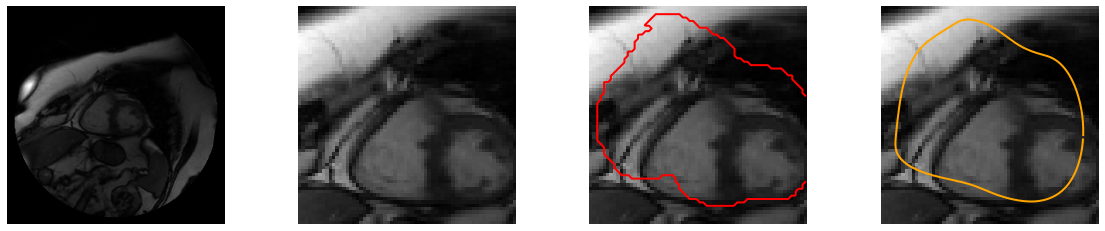

In [0]:
f, ax = plt.subplots(ncols=4, figsize=(20,4))
idx = 4


X_input = X_fullsize[idx].reshape((256,256))
X_roi = stacked_ae.open_data_AE(X_fullsize[idx:idx+1], y_pred[idx:idx+1], contour_mask[idx:idx+1])[0].reshape((64,64))

bin_pred = models_sae_loss[2][idx]
contours_pred = measure.find_contours(bin_pred, 0.8)
contour_pred = contours_pred[np.argmax([k.shape[0] for k in contours_pred])]

img = models_sae_loss[0][idx].reshape((64,64))
ac_contour = active_contour(img, contour_pred, alpha=0.01, beta=1)

ax[0].imshow(X_input, cmap='gray')
ax[1].imshow(X_roi, cmap='gray')
ax[2].imshow(img, cmap='gray')
ax[2].plot(contour_pred[:, 1], contour_pred[:, 0], linewidth=2, color='red',label='Prediction')
ax[3].imshow(img, cmap='gray')
ax[3].plot(ac_contour[:, 1], ac_contour[:, 0], linewidth=2, color='orange',label='Prediction')
for i in range(4):
    ax[i].axis('off')
#plt.savefig('./Rapport/images/final_results.png')


The end
















































































